# Наивный байесовский классификатор (Naive Bayes classifier)

---

**Источники:**

[sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

[Naive Bayes Classification using Scikit-learn](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn)

[4 Types of Classification Tasks in Machine Learning](https://machinelearningmastery.com/types-of-classification-in-machine-learning/#:~:text=In%20machine%20learning%2C%20classification%20refers,one%20of%20the%20known%20characters.)

[Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

[Теорема Байеса](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%B0)

---


## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

In [7]:
import sklearn

sklearn.__version__


'0.24.1'

## Загрузка данных

[Источник (Classification Data -Apples & Oranges)](https://www.kaggle.com/raykleptzo/classification-data-apples-oranges).

In [23]:
df = pd.read_csv('./../../data/apples_and_oranges.csv')

# показать все колонки
pd.options.display.max_columns = None

# изменить формат отображения с помощью средства форматирования
# (float без E, а 2 знаков после запятой)
# (для удобства чтения)
pd.options.display.float_format = '{:.2f}'.format

# отобразить первые 5 и последние 5 строк
df

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


### Предварительная обработка (pre-processing) и выбор (selection) данных

In [24]:
X = df[['Weight', 'Size']]
X

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70
5,73,5.68
6,70,5.56
7,75,5.11
8,74,5.36
9,65,4.27


In [25]:
y = df["Class"]
y

0     orange
1     orange
2     orange
3      apple
4     orange
5      apple
6      apple
7      apple
8      apple
9     orange
10     apple
11     apple
12     apple
13    orange
14     apple
15    orange
16    orange
17     apple
18    orange
19     apple
20    orange
21    orange
22    orange
23    orange
24    orange
25     apple
26    orange
27    orange
28     apple
29     apple
30     apple
31    orange
32     apple
33     apple
34    orange
35    orange
36    orange
37     apple
38     apple
39     apple
Name: Class, dtype: object

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3)

print('Shape of X training set {}'.format(X_train.shape),'&',' Size of y training set {}'.format(y_train.shape))

Shape of X training set (28, 2) &  Size of y training set (28,)


## Теорема Байеса

TODO

**Теорема Байеса (или формула Байеса)** — одна из основных теорем элементарной теории вероятностей, которая **позволяет определить вероятность какого-либо события при условии, что произошло другое статистически взаимозависимое с ним событие**.

Другими словами, по формуле Байеса можно более точно пересчитать вероятность, взяв в расчёт как ранее известную информацию, так и данные новых наблюдений. 

## Наивный байесовский классификатор (Naive Bayes classifier)

Наивный байесовский классификатор (Naive Bayes classifier) - это простой вероятностный классификатор, основанный на применении теоремы Байеса со строгими (наивными) предположениями о независимости.

Несмотря на наивный вид и, несомненно, очень упрощенные условия, наивные байесовские классификаторы часто работают намного лучше нейронных сетей во многих сложных ситуациях.

Достоинством наивного байесовского классификатора является малое количество данных, необходимых для обучения, оценки параметров и классификации.

Хоть наивный байесовский классификатор известен как хороший классификатор, он также известен как плохой оценщик, поэтому **к вероятностным выходным данным `pred_proba` не стоит относиться слишком серьезно**.

In [27]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model

GaussianNB()

In [28]:
model.fit(X_train, y_train)

GaussianNB()

In [29]:
y_predicted = model.predict(X_test)

## Оценка качества модели (Evaluation)

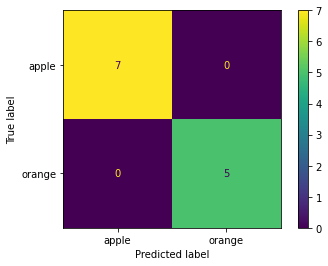

In [30]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         7
      orange       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [32]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predicted, average='weighted') 

1.0

In [33]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_predicted))

Accuracy:  1.0
